In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
sns.set()
import plotly
import pandas_profiling 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import optuna
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df= pd.read_excel("sample data - rnv.xlsx",sheet_name="Ecommerce Customers")

In [3]:
#profile = df.profile_report(title='Pandas Profiling Report - Ecommerce Customers')
#profile.to_file(output_file="Data_Profiling_Ecommerce_Customers.html")
#This library do quickly an EDA with HTML page.

## EDA

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.shape

(500, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [9]:
import re
df["State"]="Null"
for i in range(len(df)):
    df["State"].iloc[i]=re.findall("(?:^|\s)[A-Z]{2}(?:^|\s)",df["Address"].iloc[i])
df['State'] = df['State'].str.get(0)

C:\Users\PC\AppData\Local\Temp\ipykernel_15284\238879715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["State"].iloc[i]=re.findall("(?:^|\s)[A-Z]{2}(?:^|\s)",df["Address"].iloc[i])


<AxesSubplot:>

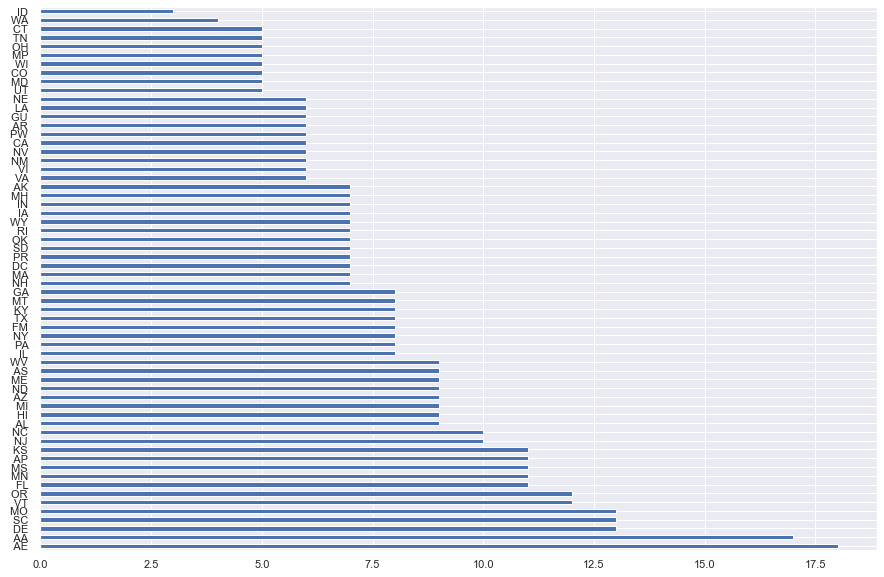

In [10]:
plt.figure(figsize=(15,10))
df["State"].value_counts().plot(kind="barh")


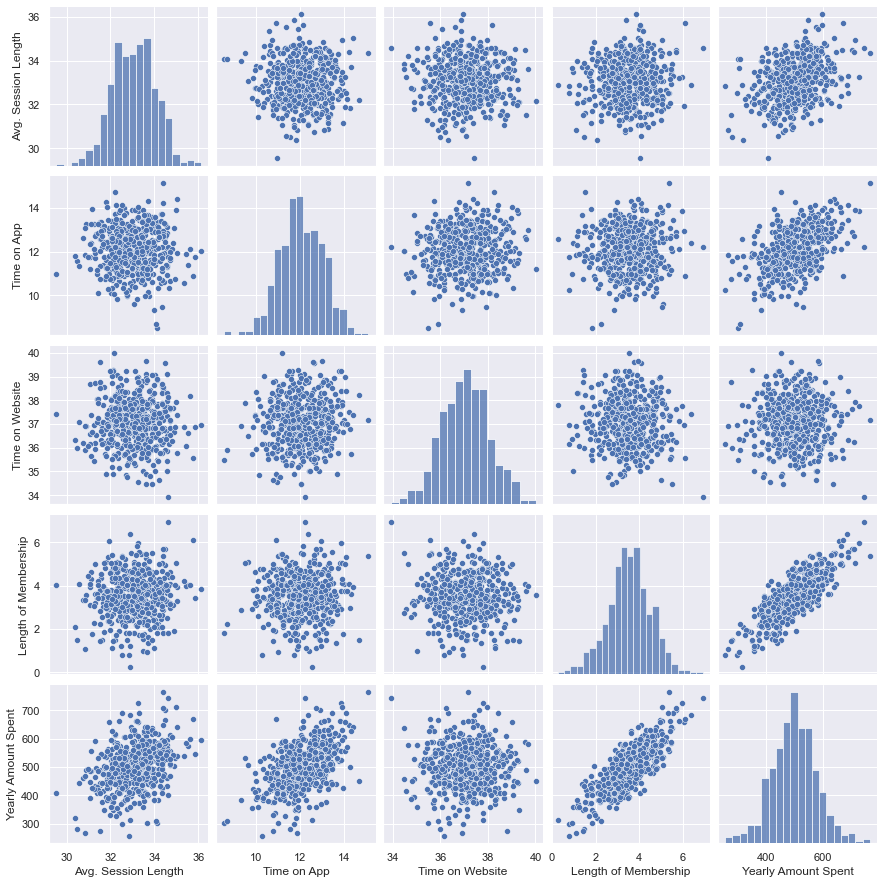

In [11]:
sns.pairplot(df)

In [12]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'State'],
      dtype='object')

<AxesSubplot:xlabel='Avg. Session Length', ylabel='Count'>

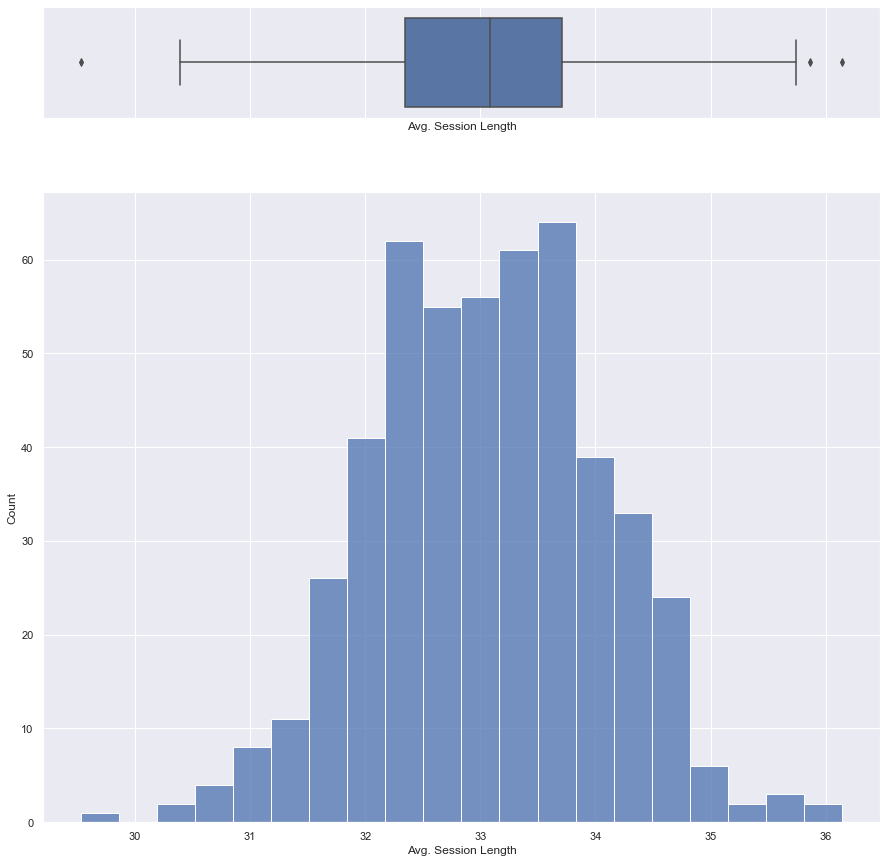

In [13]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(15,15))
sns.boxplot(df["Avg. Session Length"], ax=ax_box)
sns.histplot(data=df, x="Avg. Session Length", ax=ax_hist)

<AxesSubplot:xlabel='Time on App', ylabel='Count'>

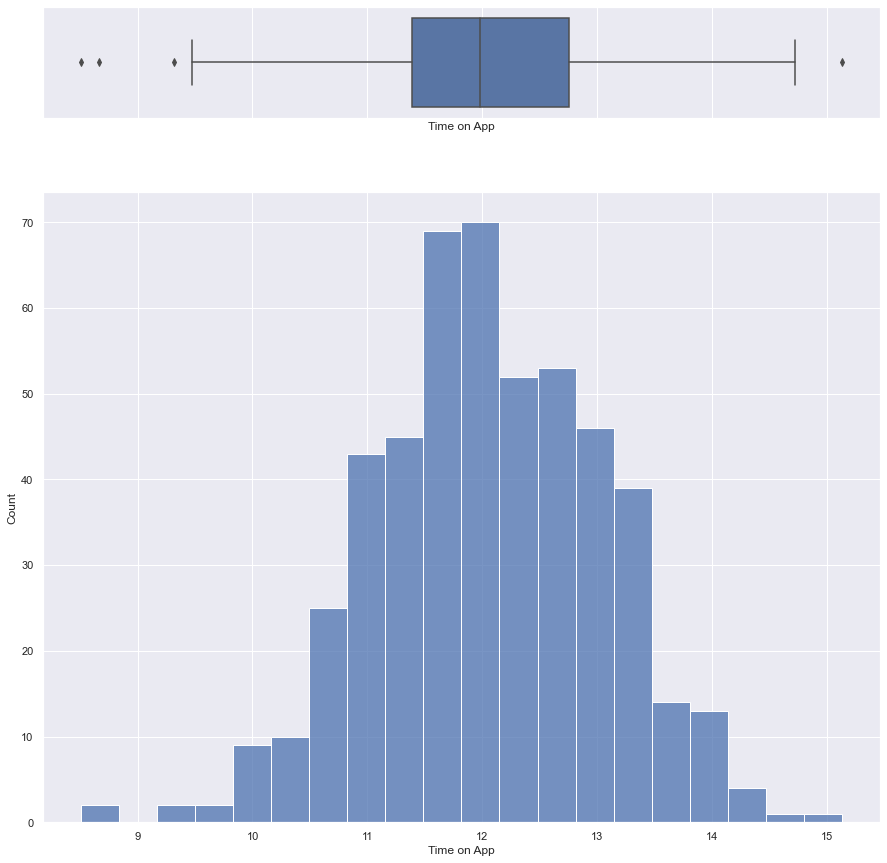

In [14]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(15,15))
sns.boxplot(df["Time on App"], ax=ax_box)
sns.histplot(data=df, x="Time on App", ax=ax_hist)

<AxesSubplot:xlabel='Time on Website', ylabel='Count'>

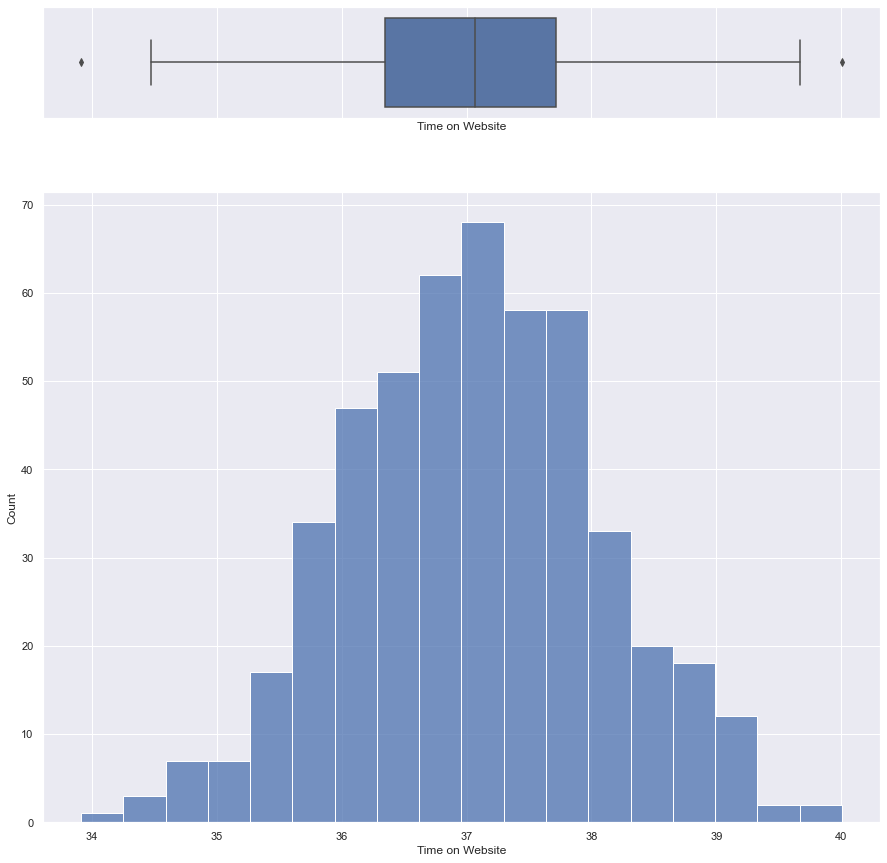

In [15]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(15,15))
sns.boxplot(df["Time on Website"], ax=ax_box)
sns.histplot(data=df, x="Time on Website", ax=ax_hist)

<AxesSubplot:xlabel='Length of Membership', ylabel='Count'>

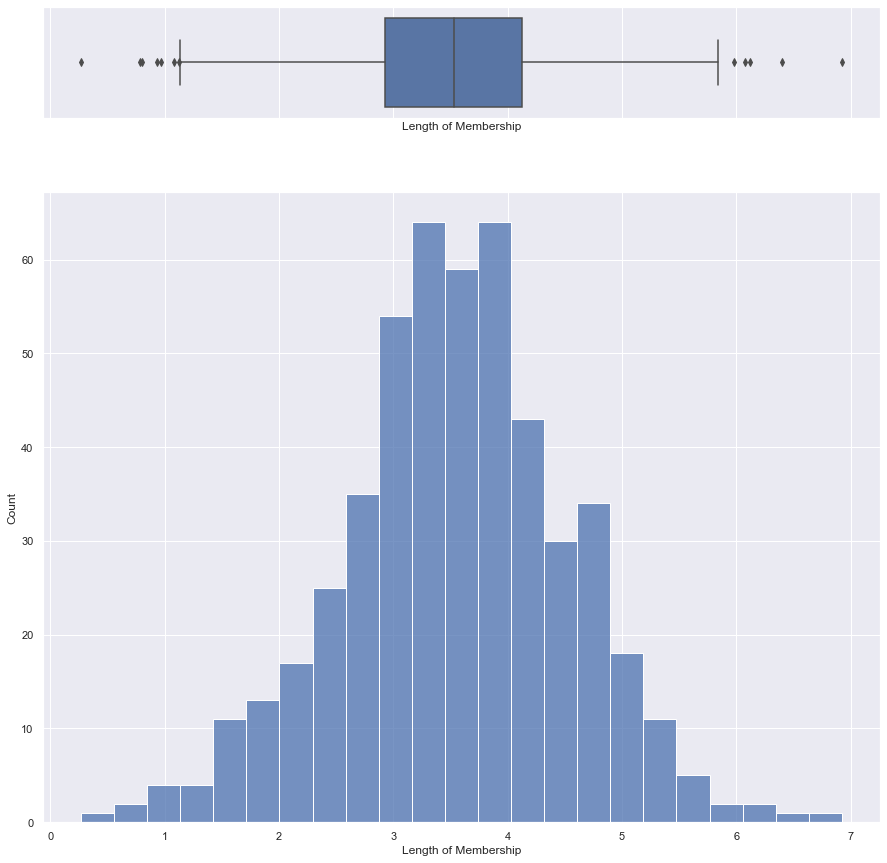

In [16]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(15,15))
sns.boxplot(df["Length of Membership"], ax=ax_box)
sns.histplot(data=df, x="Length of Membership", ax=ax_hist)

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

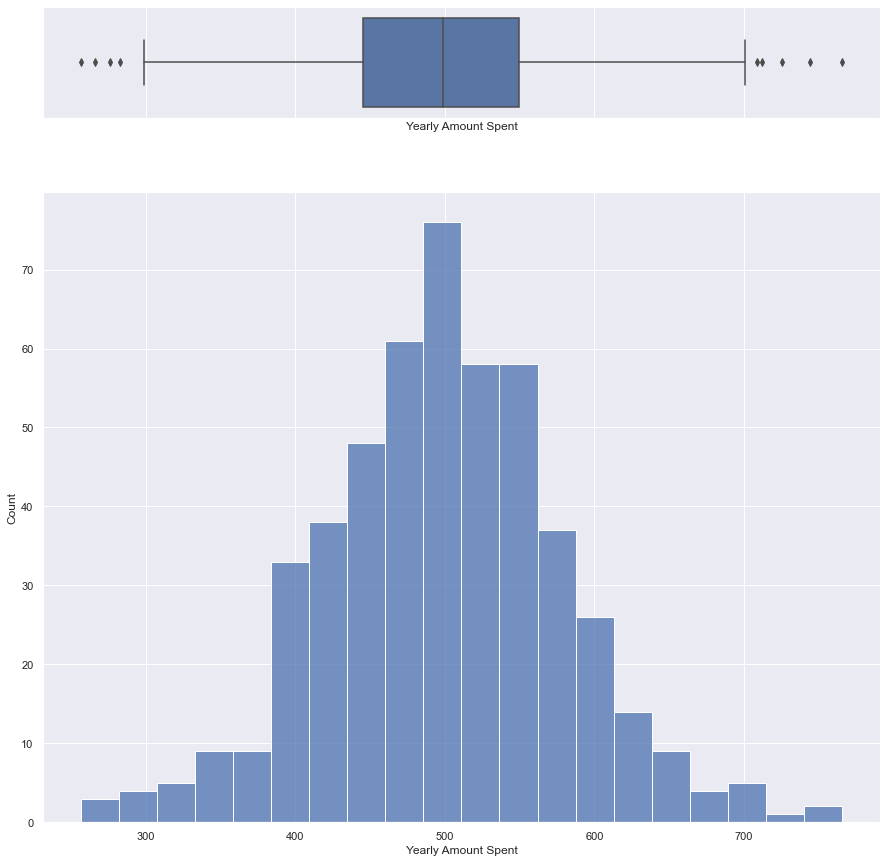

In [17]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(15,15))
sns.boxplot(df["Yearly Amount Spent"], ax=ax_box)
sns.histplot(data=df, x="Yearly Amount Spent", ax=ax_hist)

### Outlier Handling

In [18]:
for x in df.columns:
    if df[x].dtypes in ["int64","float64"]:
        Q1= np.percentile(df[x],25)
        Q3=np.percentile(df[x],75)
        IQR = Q3 -Q1
        out1 = Q1 - 1.5*IQR
        out2 = 1.5*IQR + Q3
        for i in range(len(df[x])):
            if df[x].iloc[i] < out1:
                df[x].iloc[i] = out1
            elif df[x].iloc[i] > out2:
                df[x].iloc[i] = out2

C:\Users\PC\AppData\Local\Temp\ipykernel_15284\3483094677.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x].iloc[i] = out1
C:\Users\PC\AppData\Local\Temp\ipykernel_15284\3483094677.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x].iloc[i] = out2


In [19]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'State'],
      dtype='object')

### Separating data sets

In [20]:
y = df[['Yearly Amount Spent']]
X = df.drop(['Yearly Amount Spent','Email', 'Address', 'Avatar','State'], axis=1)

### Separating Train and Test

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
from xgboost import XGBRegressor 

### Hyperparameter Optimization

In [22]:
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    param = {
        'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 10000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [23]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-07-07 00:49:35,496] A new study created in memory with name: no-name-1c1f065b-81c8-498c-b2a7-f9409ba8f04b
C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-07-07 00:49:39,352] Trial 0 finished with value: 43.517173405953 and parameters: {'lambda': 0.2564000285434888, 'alpha': 0.0012677047441490904, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 86}. Best is trial 0 with value: 43.517173405953.
C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-07-07 00:49:40,133] Trial 1 finis

[I 2022-07-07 00:50:39,390] Trial 13 finished with value: 12.531493520138024 and parameters: {'lambda': 8.882903492250502, 'alpha': 5.28964601920986, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 2}. Best is trial 13 with value: 12.531493520138024.
C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-07-07 00:50:41,091] Trial 14 finished with value: 43.39695410638425 and parameters: {'lambda': 1.2364559685650636, 'alpha': 7.652743900111061, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 77}. Best is trial 13 with value: 12.531493520138024.
C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early

[I 2022-07-07 00:52:04,627] Trial 27 finished with value: 35.655099401066444 and parameters: {'lambda': 4.413256605215528, 'alpha': 0.023611764877363103, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 50}. Best is trial 13 with value: 12.531493520138024.
C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-07-07 00:52:05,899] Trial 28 finished with value: 59.31785506618613 and parameters: {'lambda': 0.2695462280430314, 'alpha': 2.3048182648540143, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.012, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 127}. Best is trial 13 with value: 12.531493520138024.
C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-07-07 00:53:13,889] Trial 41 finished with value: 14.72449870186721 and parameters: {'lambda': 2.8387942128578545, 'alpha': 2.0819279771736032, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.008, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 13}. Best is trial 13 with value: 12.531493520138024.
C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-07-07 00:53:19,243] Trial 42 finished with value: 14.960757764636359 and parameters: {'lambda': 6.3944216808124805, 'alpha': 1.4488154282161185

C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-07-07 00:57:31,008] Trial 55 finished with value: 26.099628590457773 and parameters: {'lambda': 0.02577811110341487, 'alpha': 0.07723399342786555, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 29}. Best is trial 13 with value: 12.531493520138024.
C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-07-07 00:57:34,733] Trial 56 finished with value: 17.108696151000565 and parameters: {'lambda': 0.0016576943807053387, 'alpha': 0.039317343

C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-07-07 00:59:54,681] Trial 69 finished with value: 31.06384185265366 and parameters: {'lambda': 0.18480948783146472, 'alpha': 2.601100579445707, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 42}. Best is trial 66 with value: 12.481336073458635.
C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-07-07 01:00:01,743] Trial 70 finished with value: 12.488187566865479 and parameters: {'lambda': 2.2198080008994827, 'alpha': 0.9531623561075128

C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-07-07 01:01:39,595] Trial 83 finished with value: 60.87513984535853 and parameters: {'lambda': 3.0578087683630457, 'alpha': 1.96609012556288, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 166}. Best is trial 81 with value: 11.86457912724078.
C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-07-07 01:01:50,080] Trial 84 finished with value: 11.391436356631068 and parameters: {'lambda': 5.6083392214315335, 'alpha': 7.080715561052569, 'c

C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-07-07 01:03:45,020] Trial 97 finished with value: 21.299583224465746 and parameters: {'lambda': 0.9420069071354074, 'alpha': 2.8745432460730207, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 30}. Best is trial 84 with value: 11.391436356631068.
C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-07-07 01:03:45,898] Trial 98 finished with value: 68.23508756479809 and parameters: {'lambda': 1.9547837437981783, 'alpha': 2.052862365391443, 

Number of finished trials: 100
Best trial: {'lambda': 5.6083392214315335, 'alpha': 7.080715561052569, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 7}


In [24]:
Best_trial = study.best_trial.params
Best_trial["n_estimators"], Best_trial["tree_method"] = 10000, 'gpu_hist'
Best_trial

{'lambda': 5.6083392214315335,
 'alpha': 7.080715561052569,
 'colsample_bytree': 0.5,
 'subsample': 0.8,
 'learning_rate': 0.01,
 'max_depth': 7,
 'random_state': 2020,
 'min_child_weight': 7,
 'n_estimators': 10000,
 'tree_method': 'gpu_hist'}

### Running the model with best trial

In [25]:
model = XGBRegressor(**Best_trial)
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [26]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,pred))
print('MSE',metrics.mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE 9.650864634591734
MSE 139.6921544996289
RMSE 11.819143560327412


In [27]:
metrics.explained_variance_score(y_test,pred)

0.9704972932951738

In [28]:
r2_score(y_test,pred)

0.9699975575211182

Text(0.5, 1.0, 'Feature Importance')

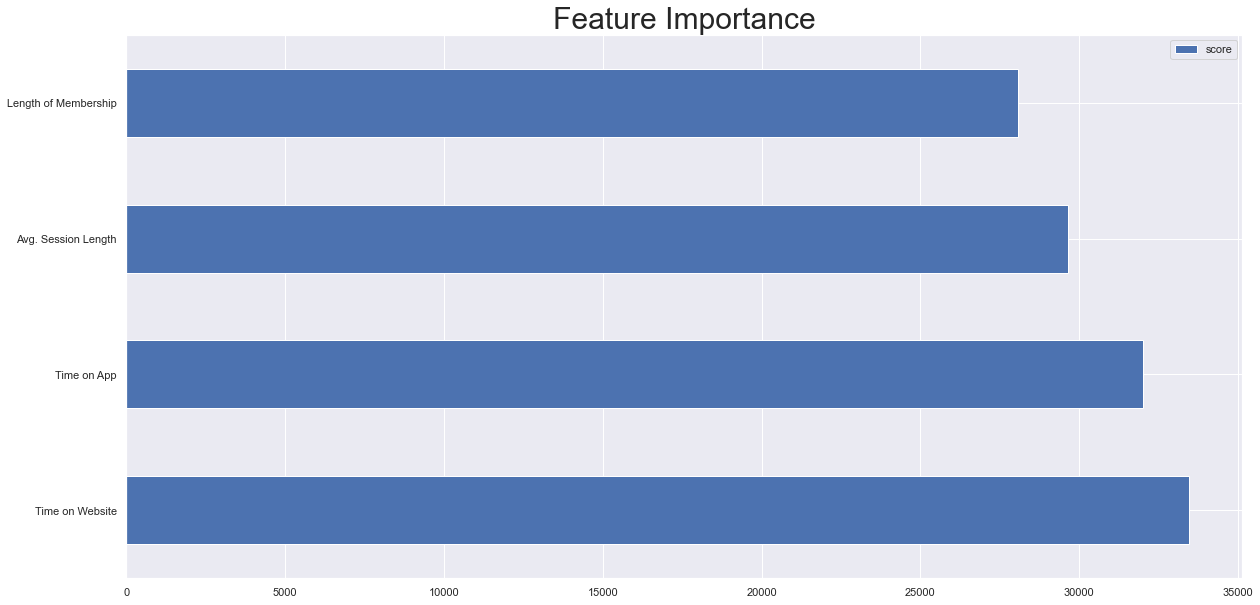

In [29]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features
plt.title("Feature Importance",fontsize=30)

### Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression
lim=LinearRegression()
lim.fit(X_train,y_train)
pred2=lim.predict(X_test)

In [35]:
print('MAE',metrics.mean_absolute_error(y_test,pred2))
print('MSE',metrics.mean_squared_error(y_test,pred2))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,pred2)))
print("Variance Score",metrics.explained_variance_score(y_test,pred2))
print("R2",r2_score(y_test,pred2))

MAE 8.261637889205316
MSE 103.27656856095231
RMSE 10.162507985775575
Variance Score 0.9779472796357748
R2 0.9778187306311859


In [36]:
lim.coef_


array([[25.29650805, 38.70141553,  0.34386264, 62.3375272 ]])

In [37]:
cdf=pd.DataFrame([25.29650805, 38.70141553,  0.34386264, 62.3375272 ],['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership'],columns=['Coeffs'])
cdf

,Coeffs
Avg. Session Length,25.296508
Time on App,38.701416
Time on Website,0.343863
Length of Membership,62.337527


Text(0.5, 1.0, 'Feature Importance')

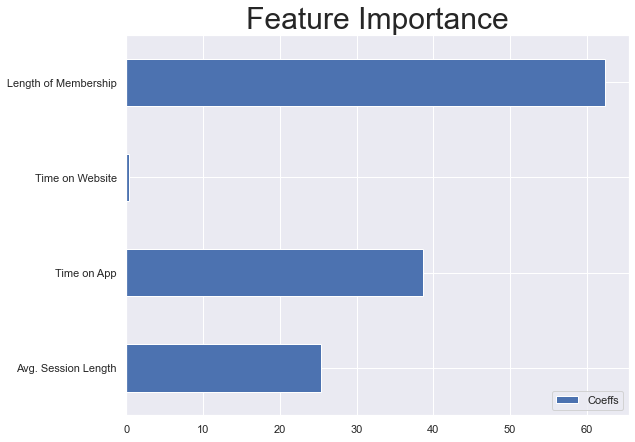

In [38]:
cdf.plot(kind='barh', figsize=(9, 7))
plt.title("Feature Importance",fontsize=30)

In [ ]:
r2_score(y_test,pred)